In [ ]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data='/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/'

In [ ]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [ ]:
images[:20]

['/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/45.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/827.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/387.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/72.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/348.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/799.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/936.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/722.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/650.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiog

In [ ]:
len(images)

5420

In [ ]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])
#Extracting Class Values

In [ ]:
class_values[:10]

['Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis']

In [ ]:
len(class_values)

5420

In [ ]:
temp = list(zip(images,class_values))
#Zipping Image Paths and Class Labels
random.shuffle(temp)
#reordering ensures that the pairing of image paths and class labels is maintained
images, class_values = zip(*temp)
#Unzipping the Shuffled Data
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'class_label'])
#Creating a Pandas DataFrame

In [ ]:
data

,image_path,class_label
0,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
1,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
3,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
...,...,...
5415,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
5416,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
5417,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
5418,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis


In [ ]:
data.class_label.value_counts()

class_label
Normal          3504
Tuberculosis    1916
Name: count, dtype: int64

In [ ]:
df_c0 = data[data['class_label'] =="Tuberculosis"]
df_c1 = data[data['class_label'] =="Normal"]

In [ ]:
from sklearn.utils import resample
unsampled_df_c0 = resample(df_c0, replace=True, random_state=23, n_samples=1916)
unsampled_df_c1 = resample(df_c1, replace=True, random_state=23, n_samples=3500)
#each containing 100 samples randomly drawn with replacement from their respective original datasets

In [ ]:
df_unsampled = pd.concat([unsampled_df_c0, unsampled_df_c1])
df_unsampled

,image_path,class_label
1724,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2127,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
3062,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2739,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4299,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
...,...,...
1677,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2170,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4916,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4916,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal


In [ ]:
df_unsampled.head()

,image_path,class_label
1724,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2127,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
3062,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2739,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4299,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis


In [ ]:
df_unsampled.tail()

,image_path,class_label
1677,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2170,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4916,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4916,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4674,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal


In [ ]:
df_unsampled.class_label.value_counts()

class_label
Normal          3500
Tuberculosis    1916
Name: count, dtype: int64

In [ ]:
df_unsampled.shape

(5416, 2)

In [ ]:
data = df_unsampled.sample(frac=1)
data.shape

(5416, 2)

In [ ]:
data[:10]

,image_path,class_label
1542,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
3861,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4949,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
5025,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
5201,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
1531,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
5081,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2741,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4418,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2912,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis


<ipython-input-22-2d1eefe42530>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
<ipython-input-22-2d1eefe42530>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class_label')

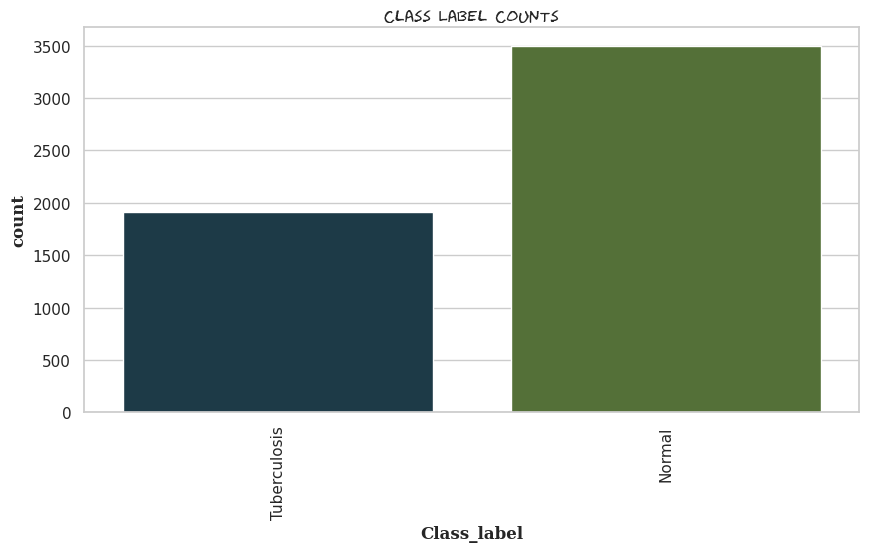

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [ ]:
import cv2
import numpy as np
from tqdm import tqdm  # Optional, for progress bar

def resize_image(img_path):
    file = cv2.imread(img_path)
    resized = cv2.resize(file, (224, 224), interpolation=cv2.INTER_AREA)
    return resized

# Assuming data['image_path'] contains the paths of the original images
images = [resize_image(img_path) for img_path in tqdm(data['image_path'], desc="Resizing images")]

# Convert the list of images to a single NumPy array
images_array = np.stack(images, axis=0)

# Now, images_array is a single NumPy array containing all the resized images
print(images_array.shape)


Resizing images: 100%|██████████| 5416/5416 [08:29<00:00, 10.62it/s]


(5416, 224, 224, 3)


In [ ]:
len(images)

5416

In [ ]:
data['class_label'][:15]

1542          Normal
3861          Normal
4949          Normal
5025          Normal
5201          Normal
1531    Tuberculosis
5081    Tuberculosis
2741    Tuberculosis
4418    Tuberculosis
2912    Tuberculosis
2410          Normal
4228          Normal
2307          Normal
120     Tuberculosis
3921          Normal
Name: class_label, dtype: object

In [ ]:
class_names = list(data['class_label'])

In [ ]:
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'Tuberculosis')

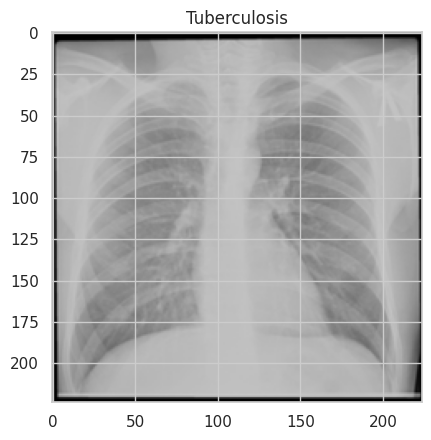

In [ ]:
plt.imshow(images[86])
plt.title(class_names[86])

Text(0.5, 1.0, 'Tuberculosis')

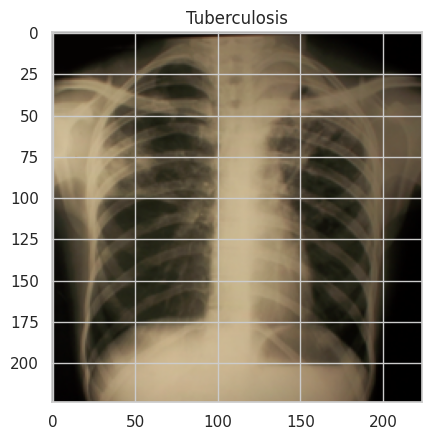

In [ ]:
plt.imshow(images[188])
plt.title(class_names[188])

In [ ]:
images = np.array(images)

In [ ]:
images.shape

(5416, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])
# y contain the binary representation of the class labels

In [ ]:
enc.classes_

array(['Normal', 'Tuberculosis'], dtype='<U12')

In [ ]:
data['class_label'][:10]

1542          Normal
3861          Normal
4949          Normal
5025          Normal
5201          Normal
1531    Tuberculosis
5081    Tuberculosis
2741    Tuberculosis
4418    Tuberculosis
2912    Tuberculosis
Name: class_label, dtype: object

In [ ]:
y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
y=np.array(y)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.2, stratify=y, random_state=43)

In [ ]:
y_train[:5]

array([[0],
       [1],
       [1],
       [0],
       [1]])

In [ ]:
y = []
for i in data['class_label']:
    if i == 'Normal':
        k = [1, 0]
        y.append(k)
    else:
        k = [0, 1]
        y.append(k)

In [ ]:
y[:5]

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]

In [ ]:
y=np.array(y)
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]])

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.2, stratify=y, random_state=43)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4332, 224, 224, 3), (4332, 2), (1084, 224, 224, 3), (1084, 2))

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4332, 224, 224, 3), (4332, 2), (1084, 224, 224, 3), (1084, 2))

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Flatten y_train to a 1D array
y_train_flat = y_train.ravel()

# Assuming binary classification, compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_flat), y=y_train_flat)
class_weight_dict = dict(enumerate(class_weights))

# Inception v3

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 dense (Dense)               (None, 5, 5, 128)         262272    
                                                                 
 dropout (Dropout)           (None, 5, 5, 128)         0         
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               409728    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                         

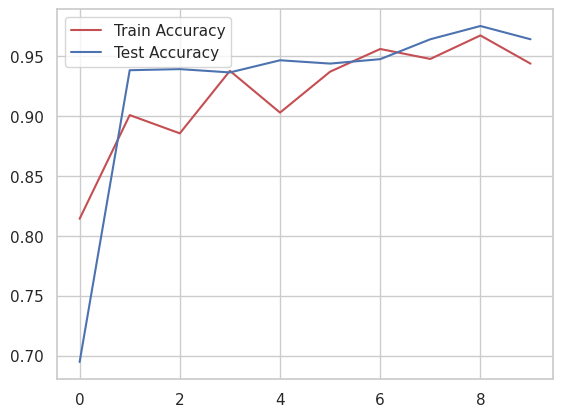

Test accuracy: 0.964022159576416


In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Import the InceptionV3 model
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception.trainable = False

# Set the InceptionV3 model
model_3 = Sequential()
model_3.add(inception)
model_3.add(Dense(128, activation='relu'))
# ReLU is defined as f(x)=max(0,x), where x is the input to the function.
model_3.add(Dropout(0.2))
# 20% of the neurons in the previous layer will be randomly set to zero during each training batch
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(2, activation='softmax'))
# Softmax activation is used in the output layer for binary classification
model_3.summary()

# Compile the model
model_3.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])
History_2 = model_3.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128, class_weight=class_weight_dict)

# Plot the accuracy plot
plt.plot(History_2.history['accuracy'], 'r')
plt.plot(History_2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy': 'b'})
plt.show()

# Evaluate and print test accuracy
score_2 = model_3.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])


34/34 [==============================] - 112s 3s/step


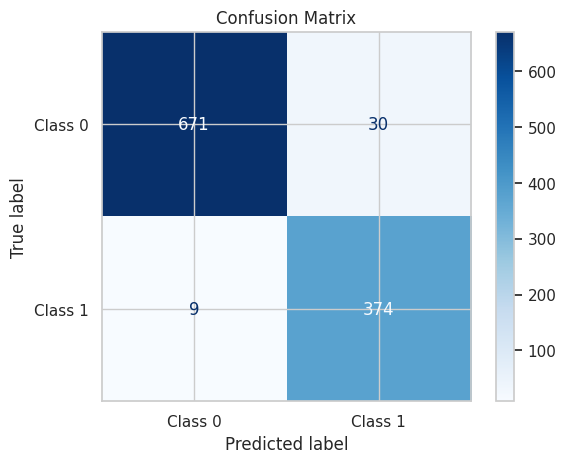

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Plot the confusion matrix

y_pred = model_3.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix')

plt.show()




34/34 [==============================] - 111s 3s/step


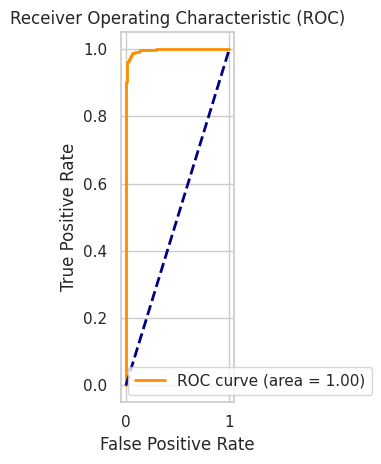

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc

#

# Plot ROC curve
y_pred_prob = model_3.predict(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()

plt.tight_layout()
plt.show()




In [ ]:
from tensorflow.keras.models import load_model
model_3.save('/content/drive/MyDrive/saved_models/m1_new.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Prediction for Inception v3


In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/saved_models/m1_new.h5')

# Predict on x_test
y_pred = loaded_model.predict(x_test)

# Convert predictions to binary values (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
print('Accuracy:', accuracy)

# Calculate other metrics
report = classification_report(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
print('Classification Report:\n', report)



34/34 [==============================] - 113s 3s/step
Accuracy: 0.9640221402214022
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       701
           1       0.93      0.98      0.95       383

    accuracy                           0.96      1084
   macro avg       0.96      0.97      0.96      1084
weighted avg       0.97      0.96      0.96      1084



# Xception

83683744/83683744 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 2048)        0         
 D)                                                              
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                        

Epoch 1/10
34/34 [==============================] - 1195s 35s/step - loss: 0.4511 - accuracy: 0.8292 - val_loss: 0.3101 - val_accuracy: 0.9013
Epoch 2/10
34/34 [==============================] - 1176s 35s/step - loss: 0.2483 - accuracy: 0.9148 - val_loss: 0.2068 - val_accuracy: 0.9354
Epoch 3/10
34/34 [==============================] - 1165s 34s/step - loss: 0.1940 - accuracy: 0.9342 - val_loss: 0.1349 - val_accuracy: 0.9520
Epoch 4/10
34/34 [==============================] - 1216s 36s/step - loss: 0.1634 - accuracy: 0.9432 - val_loss: 0.3668 - val_accuracy: 0.8423
Epoch 5/10
34/34 [==============================] - 1163s 34s/step - loss: 0.1579 - accuracy: 0.9462 - val_loss: 0.2354 - val_accuracy: 0.8994
Epoch 6/10
34/34 [==============================] - 1142s 34s/step - loss: 0.1384 - accuracy: 0.9531 - val_loss: 0.1842 - val_accuracy: 0.9170
Epoch 7/10
34/34 [==============================] - 1179s 35s/step - loss: 0.1403 - accuracy: 0.9529 - val_loss: 0.9074 - val_accuracy: 0.6716

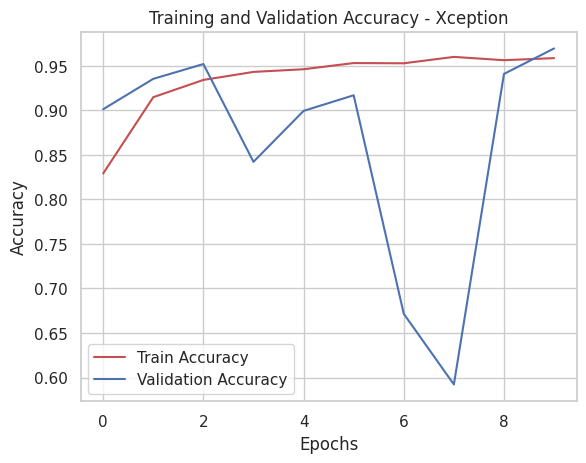

Test accuracy: 0.9695571660995483
34/34 [==============================] - 214s 6s/step


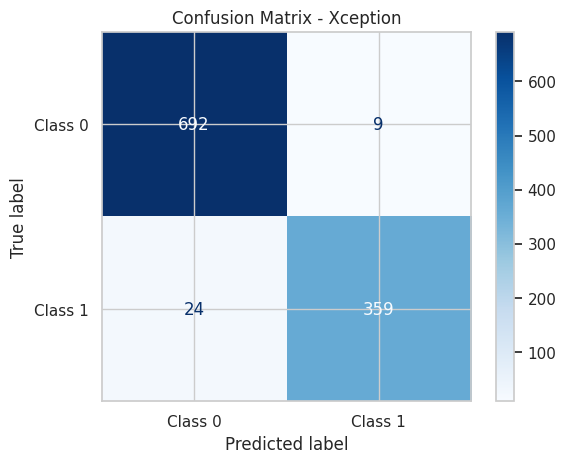

In [ ]:
from keras.applications.xception import Xception
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Import the Xception model
xception = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
xception.trainable = False

# Set the Xception model
model_xception = Sequential()
model_xception.add(xception)
model_xception.add(MaxPooling2D(pool_size=(2, 2)))  # Adding MaxPooling layer
model_xception.add(GlobalAveragePooling2D())  # Adding Global Average Pooling layer
model_xception.add(Dense(256, activation='relu'))
model_xception.add(BatchNormalization())  # Adding Batch Normalization
model_xception.add(Dropout(0.5))
model_xception.add(Dense(128, activation='relu'))
model_xception.add(BatchNormalization())
model_xception.add(Dropout(0.5))
model_xception.add(Dense(64, activation='relu'))
model_xception.add(BatchNormalization())
model_xception.add(Dropout(0.5))
model_xception.add(Dense(2, activation='softmax'))
model_xception.summary()

# Compile the model
model_xception.compile(optimizer=RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
History_xception = model_xception.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128)

# Plot the accuracy plot
plt.plot(History_xception.history['accuracy'], 'r', label='Train Accuracy')
plt.plot(History_xception.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Xception')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate and print test accuracy
score_xception = model_xception.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_xception[1])

# Plot the confusion matrix
y_pred_xception = model_xception.predict(x_test)
y_pred_classes_xception = np.argmax(y_pred_xception, axis=1)
y_true_xception = np.argmax(y_test, axis=1)
cm_xception = confusion_matrix(y_true_xception, y_pred_classes_xception)
disp_xception = ConfusionMatrixDisplay(confusion_matrix=cm_xception, display_labels=['Class 0', 'Class 1'])
disp_xception.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix - Xception')
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
model_xception.save('/content/drive/MyDrive/saved_models/m2_new(1).h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Prediction for Xception Model


In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/saved_models/m2_new(1).h5')

# Predict on x_test
y_pred = loaded_model.predict(x_test)

# Convert predictions to binary values (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
print('Accuracy:', accuracy)

# Calculate other metrics
report = classification_report(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
print('Classification Report:\n', report)



34/34 [==============================] - 217s 6s/step
Accuracy: 0.9695571955719557
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       701
           1       0.98      0.94      0.96       383

    accuracy                           0.97      1084
   macro avg       0.97      0.96      0.97      1084
weighted avg       0.97      0.97      0.97      1084



#Prediction for Inceptionv3


In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/saved_models/m5_new(1).h5')

# Predict on x_test
y_pred = loaded_model.predict(x_test)

# Convert predictions to binary values (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
print('Accuracy:', accuracy)

# Calculate other metrics
report = classification_report(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
print('Classification Report:\n', report)



34/34 [==============================] - 3s 29ms/step
Accuracy: 0.9234317343173432
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       701
           1       0.89      0.90      0.89       383

    accuracy                           0.92      1084
   macro avg       0.92      0.92      0.92      1084
weighted avg       0.92      0.92      0.92      1084



#prediction



In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the pre-trained model
model_path = '/content/drive/MyDrive/saved_models/m5_new(1).h5'
model = load_model(model_path)

# Function to preprocess the input image
def preprocess_input_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming your model expects 224x224 images
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values to the range [0, 1]
    return img_array

# Function to make predictions using the pre-trained model
def predict_tuberculosis(model, img_path):
    input_image = preprocess_input_image(img_path)
    prediction = model.predict(input_image)
    return prediction

# Specify the path to the input image
input_image_path = '/content/drive/MyDrive/Tuberculosis_extracted/TB_Chest_Radiography_Database/Normal/Normal-2160.png'

# Make prediction
prediction = predict_tuberculosis(model, input_image_path)

# Output the prediction
if prediction[0][0] > 0.5:  # Assuming the model output is a probability (adjust threshold as needed)
    print("The input image indicates tuberculosis.")
else:
    print("The input image indicate Normal.")


1/1 [==============================] - 0s 206ms/step
The input image indicate Normal.


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the pre-trained model
model_path = '/content/drive/MyDrive/saved_models/m5_new(1).h5'
model = load_model(model_path)

# Function to preprocess the input image
def preprocess_input_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming your model expects 224x224 images
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values to the range [0, 1]
    return img_array

# Function to make predictions using the pre-trained model
def predict_tuberculosis(model, img_path):
    input_image = preprocess_input_image(img_path)
    prediction = model.predict(input_image)
    return prediction

# Specify the path to the input image
input_image_path = '/content/drive/MyDrive/Tuberculosis_extracted/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-436.png'

# Make prediction
prediction = predict_tuberculosis(model, input_image_path)

# Output the prediction
if prediction[0][0] < 0.5:  # Assuming the model output is a probability (adjust threshold as needed)
    print("The input image indicates tuberculosis.")
else:
    print("The input image indicate Normal.")


1/1 [==============================] - 0s 234ms/step
The input image indicates tuberculosis.
